# Sarvpreet

This notebook establishes the age and metalicity relation and reveals further about the populations of accreted and in-situ globular clusters. 

1. The first plot was the initial AMR plot with polynomial fits of the accreted and insitu clusters. This is what initially revealed the bifurfaction of the accreted and insitu plots.

2. The next plot was a histogram which shows the GC distribution by metalicity. Allthough it kind of shows two distinct populations as the peaks were in different locations, it was not included in the presentation as it seemed to weak to show anything of not. the peaks were not that far apart and our sample size is too low to show anything of note.

3. The next three plots show the orbital properties laid over the initial AMR (with polynomial fits removed) as a colour plot. This revealed something that followed on from Vishnu's dynamical plots. which were that accreted GC's have high apocentric, zmax and eccentricities.

4. The next plot was the HBtype. this plot introduces another variable and we found it could possible introduce elemental abundances as a factor for our accreted clusters. this could give another insight into the milky ways history although further tests would need to be done to truly find out.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit
from astropy import units as u


#read in data
harrisP1 = pd.read_csv("data/HarrisPartI.csv")
harrisP3 = pd.read_csv("data/HarrisPartIII.csv")
Krause = pd.read_csv("data/Krause21.csv")
VandenBerg = pd.read_csv("data/vandenBerg_table2.csv")
#normalize IDs for matching
def norm_ids(series):
    return series.dropna().astype(str).str.replace(r"\s+","",regex=True).str.upper()
#create sets of normalized IDs
kraus_ids=set(norm_ids(Krause["Object"]))

#append NGC to VandenBerg IDs for matching
VandenBerg.iloc[:,0] = "NGC" + VandenBerg.iloc[:,0].astype(str)


#list of accreted GCs from dynamical plot and convert to set
list_accreted = ['Arp2' ,'NGC5024' ,'Crater' ,'IC4499', 'Pal4' ,'NGC5694' ,'NGC2298', 'NGC4147',
 'Pal14' ,'NGC7089' ,'NGC5272', 'NGC6934', 'NGC6101', 'NGC5466', 'Pal5' ,'Pal15',
 'Pal13' ,'NGC5053', 'NGC6715', 'Pal2', 'NGC1261', 'Whiting1' ,'NGC5634',
 'NGC7492', 'Terzan7', 'NGC5904' ,'IC1257', 'NGC2419' ,'NGC7006' ,'NGC6584',
 'NGC3201' ,'NGC6229' ,'Pyxis', 'NGC1904', 'NGC1851', 'NGCTer8', 'NGC6981' ,'E1',
 'NGC6864', 'Eridanus' ,'AM4', 'FSR1758']
set_accreted = set(list_accreted)


#filter both tables to only accreted GCs
Krause_filtered = Krause[Krause["Object"].isin(set_accreted)]
VandenBerg_filtered = VandenBerg[VandenBerg["#NGC"].isin(set_accreted)]
#rename column for merging
VandenBerg_filtered= VandenBerg_filtered.rename(columns={"#NGC":"ID"})

#merge both filtered tables to get accreted GCs with data from both sources
Accreted = pd.merge(Krause_filtered, VandenBerg_filtered, left_on="Object", right_on="ID", how="outer",  suffixes=("_K", "_V"))
#merge both full tables to get union of all GCs with data from both sources
Union = pd.merge(Krause, VandenBerg, left_on="Object", right_on="#NGC", how="outer",  suffixes=("_K", "_V"))

#combine columns to have single Age, FeH, ID columns which prioritize VandenBerg data
Accreted["Age"] = Accreted["Age_V"].combine_first(Accreted["Age_K"])
Accreted["FeH"] = Accreted["FeH_V"].combine_first(Accreted["FeH_K"])
Accreted["ID"] = Accreted["Object"].combine_first(Accreted["ID"])
Accreted["ID"] = Accreted["ID"].combine_first(Accreted["Object"])
Union["Age"] = Union["Age_V"].combine_first(Union["Age_K"])
Union["FeH"] = Union["FeH_V"].combine_first(Union["FeH_K"])
Union["ID"] = Union["Object"].combine_first(Union["#NGC"])
Union["ID"] = Union["#NGC"].combine_first(Union["Object"])

#drop unneeded columns
Accreted = Accreted.drop(columns=["Age_K", "Age_V", "FeH_K", "FeH_V","Object","AltName","Object","Name"])
Union = Union.drop(columns=["Age_K", "Age_V", "FeH_K", "FeH_V","AltName","Object","#NGC","Name"])
#get InSitu GCs by excluding accreted from union
InSitu = Union[~Union["ID"].isin(Accreted["ID"])].copy()
InSitu.reset_index(drop=True, inplace=True)

#move Pal12 from InSitu to Accreted
to_move = InSitu[InSitu['ID'] == 'Ruprecht106'].copy()
Accreted = pd.concat([Accreted, to_move], ignore_index=True)
InSitu = InSitu[InSitu['ID'] != 'Ruprecht106'].reset_index(drop=True)
#move rup106 from InSitu to Accreted
to_move = InSitu[InSitu['ID'] == 'NGCPal12'].copy()
Accreted = pd.concat([Accreted, to_move], ignore_index=True)
InSitu = InSitu[InSitu['ID'] != 'NGCPal12'].reset_index(drop=True)


C:\Users\ekkas\AppData\Local\Temp\ipykernel_2220\2709075132.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Accreted['FeH'], Accreted['Age'], color='red', s=50 ,label='Accreted', zorder=2  , alpha=0.7, cmap='plasma')

C:\Users\ekkas\AppData\Local\Temp\ipykernel_2220\2709075132.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(InSitu['FeH'], InSitu['Age'], color='blue',s=25 ,label='In-Situ', zorder=1, alpha=0.7,cmap='plasma')



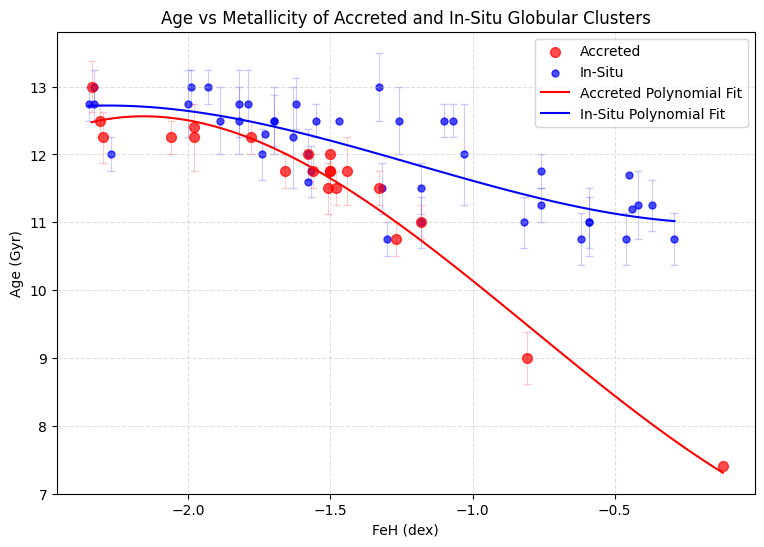

In [2]:

#plot Age vs FeH for both accreted and in-situ GCs
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(Accreted['FeH'], Accreted['Age'], color='red', s=50 ,label='Accreted', zorder=2  , alpha=0.7, cmap='plasma')
ax.errorbar(Accreted['FeH'], Accreted['Age'], yerr=Accreted['Age_err'], fmt='none', ecolor='red', capsize=3, zorder=2, linewidth=0.8, alpha=0.2)
ax.scatter(InSitu['FeH'], InSitu['Age'], color='blue',s=25 ,label='In-Situ', zorder=1, alpha=0.7,cmap='plasma')
ax.errorbar(InSitu['FeH'], InSitu['Age'], yerr=InSitu['Age_err'], fmt='none', ecolor='blue', capsize=3, zorder=1, linewidth=0.8, alpha=0.2)
#ax.scatter(Accreted['FeH'], Accreted['Age'], yerr=Accreted['Age_err'], color='red', label='Accreted',zorder=2)
#ax.scatter(InSitu['FeH'], InSitu['Age'],yerr=Accreted["Age_err"], color='blue', label='In-Situ',zorder=1)

# Add polynomial fit for accreted
ax.grid(True, ls='--', alpha=0.4)
coeffs = np.polyfit(Accreted['FeH'], Accreted['Age'], deg=3)
poly_func1 = np.poly1d(coeffs)
x_smooth1 = np.linspace(Accreted['FeH'].min(), Accreted['FeH'].max(), 100)
y_smooth1 = poly_func1(x_smooth1)
plt.plot(x_smooth1, y_smooth1, color='red', label='Accreted Polynomial Fit')

#add polynomial fit for in-situ
coeffs = np.polyfit(InSitu['FeH'], InSitu['Age'], deg=3)
poly_func = np.poly1d(coeffs)
x_smooth1 = np.linspace(InSitu['FeH'].min(), InSitu['FeH'].max(), 100)
y_smooth = poly_func(x_smooth1)
plt.plot(x_smooth1, y_smooth, color='blue', label='In-Situ Polynomial Fit')

# Add labels and legend and titles
ax.set_xlabel('FeH (dex)')
ax.set_ylabel('Age (Gyr)')
ax.legend()
ax.set_title('Age vs Metallicity of Accreted and In-Situ Globular Clusters')

plt.show()





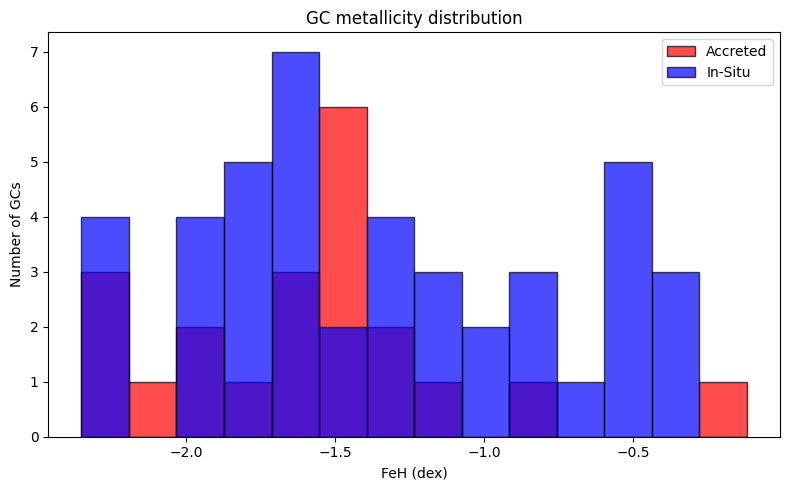

In [3]:
#ensure FeH column exists and drop NaNs
acc_feh = Accreted['FeH'].dropna()
ins_feh = InSitu['FeH'].dropna()

#bins
bins = np.linspace(min(acc_feh.min(), ins_feh.min()), max(acc_feh.max(), ins_feh.max()), 15)
#plot histogram
fig , ax = plt.subplots(figsize=(8,5))

ax.hist(acc_feh, bins=bins, alpha=0.7, label='Accreted', color='red' ,  edgecolor='black')
ax.hist(ins_feh, bins=bins, alpha=0.7, label='In-Situ', color='blue', edgecolor='black')

ax.set_xlabel('FeH (dex)')
ax.set_ylabel('Number of GCs')
ax.set_title('GC metallicity distribution')
ax.legend()
plt.tight_layout()
plt.show()


In [4]:
#get orbital parameters using galpy
orbits_galpy = Orbit.from_name('MW Globular Clusters')
names = []
apo = []
zmax = []
ecc = []


#time array for integration
ts = np.linspace(0, 100, 50000)     
orbits_galpy.integrate(ts, MWPotential2014, method='dopr54_c')
#calculate orbital parameters
for orb in orbits_galpy:    
    names.append(orb.name)
    apo.append(orb.rap(pot=MWPotential2014))
    zmax.append(orb.zmax(pot=MWPotential2014))  
    ecc.append(orb.e(pot=MWPotential2014))

names = np.array(names)
apo = np.array(apo, dtype=float)


#manual name corrections
names = ["NGCTer8" if name == "Terzan8" else name for name in names]
names = ["Ruprecht106" if name == "Rup106" else name for name in names]
names = ["NGCPal12" if name == "Pal12" else name for name in names]

# Create dictionaries for mapping
apo_dict   = dict(zip(names, apo))
zmax_dict  = dict(zip(names, zmax))
ecc_dict   = dict(zip(names, ecc))

# Map
InSitu['apo']  = InSitu['ID'].map(apo_dict)
InSitu['zmax'] = InSitu['ID'].map(zmax_dict)
InSitu['ecc']  = InSitu['ID'].map(ecc_dict)
Accreted['apo']  = Accreted['ID'].map(apo_dict)
Accreted['zmax'] = Accreted['ID'].map(zmax_dict)
Accreted['ecc']  = Accreted['ID'].map(ecc_dict)






In [5]:
#printed output of final dataframes
print(InSitu)
print(Accreted)

   Class  Mstar     rh     C5  Age_err Method   Figs        Range  HBtype  \
0     GC   6.46   7.10  0.920     0.25      V     14  11.50–11.75   -0.99   
1     GC  12.30   3.80  3.240     0.38      V     13  11.00–11.25   -0.49   
2     GC   0.46   9.80  0.050     0.38      H     24          NaN    0.98   
3     GC   2.50   3.50  0.720     0.25      V     13  10.75–11.00   -0.87   
4     GC   1.07   7.70  0.140     0.25      V     11        12.00    0.17   
5     GC   4.10   7.90  0.520     0.50      A     30          NaN    0.93   
6     GC   7.13   4.20  1.690     0.38      A  12-30  11.75–12.25    0.80   
7     GC   2.11  12.70  0.170      NaN    NaN    NaN          NaN     NaN   
8     GC   3.38   4.20  0.810     0.38      V     16  10.50–10.75   -1.00   
9     GC   5.99   5.04  1.190     0.75      A     30          NaN    0.97   
10    GC   5.02   3.02  1.660      NaN    NaN    NaN          NaN     NaN   
11    GC   1.17   4.70  0.250     0.38      V     13  11.25–11.50   -0.06   

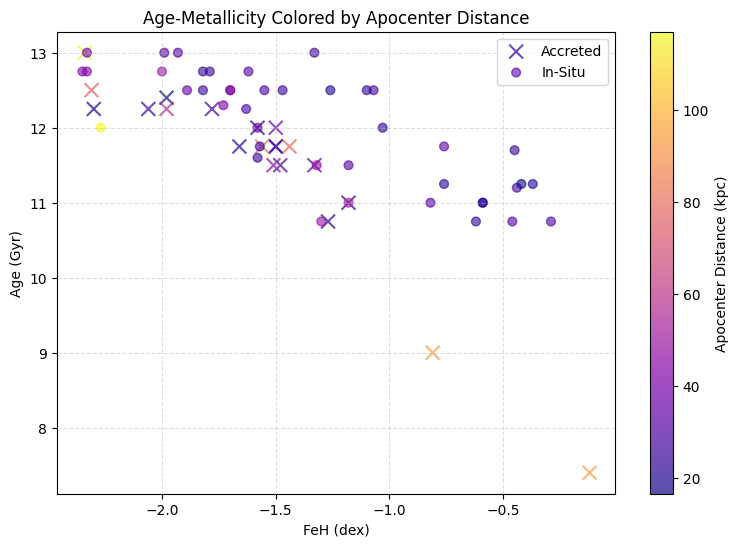

In [6]:
#plot Age vs FeH colored by apocenter distance
fig, ax = plt.subplots(figsize=(9,6))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sc = ax.scatter( Accreted['FeH'],Accreted['Age'], c=Accreted['apo'], cmap='plasma',marker='x',  s=100,  alpha=0.7,label='Accreted')
sc2 = ax.scatter(InSitu['FeH'], InSitu['Age'],c=InSitu['apo'], cmap='plasma',s=40,alpha=0.6,marker='o',label='In-Situ')


# Axis labels
ax.legend()
ax.set_xlabel('FeH (dex)')
ax.set_ylabel('Age (Gyr)')
ax.set_title('Age-Metallicity Colored by Apocenter Distance')
ax.grid(True, ls='--', alpha=0.4)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Apocenter Distance (kpc)')


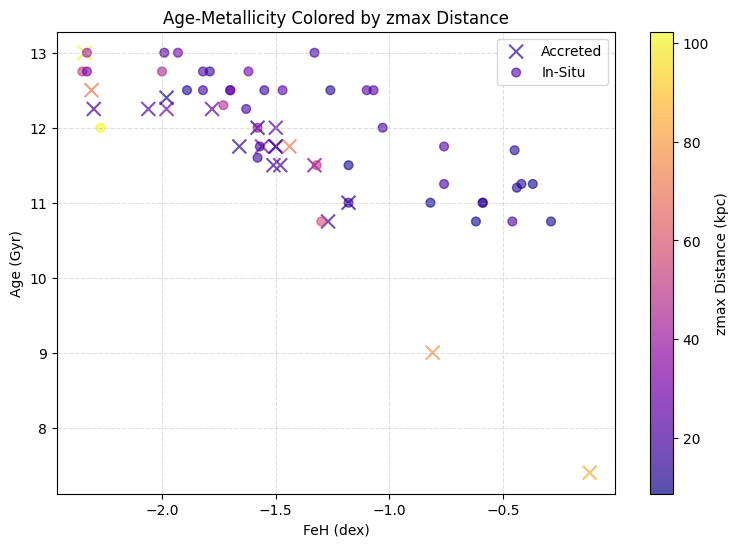

In [7]:
# plot Age vs FeH colored by zmax distance
fig, ax = plt.subplots(figsize=(9,6))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sc = ax.scatter( Accreted['FeH'],Accreted['Age'], c=Accreted['zmax'], cmap='plasma',marker='x',  s=100,  alpha=0.7,label='Accreted')
sc2 = ax.scatter(InSitu['FeH'], InSitu['Age'],c=InSitu['zmax'], cmap='plasma',s=40,alpha=0.6,marker='o',label='In-Situ')


# Axis labels
ax.legend()
ax.set_xlabel('FeH (dex)')
ax.set_ylabel('Age (Gyr)')
ax.set_title('Age-Metallicity Colored by zmax Distance')
ax.grid(True, ls='--', alpha=0.4)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('zmax Distance (kpc)')

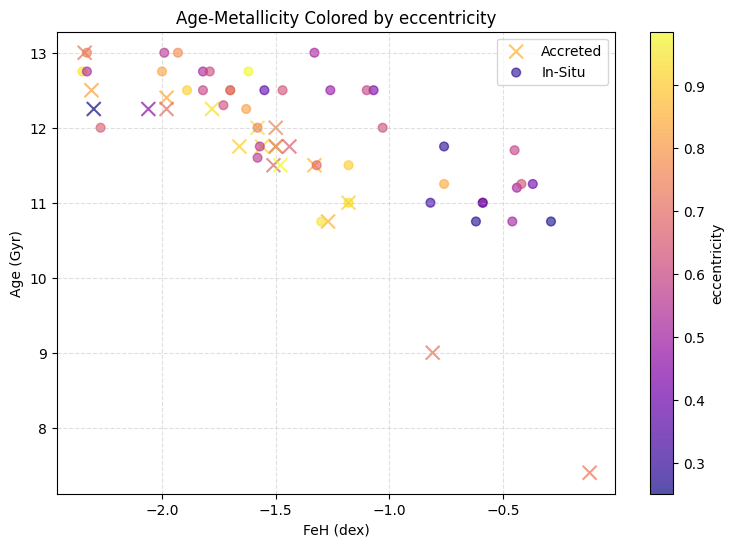

In [8]:

#plot Age vs FeH colored by eccentricity
fig, ax = plt.subplots(figsize=(9,6))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sc = ax.scatter( Accreted['FeH'],Accreted['Age'], c=Accreted['ecc'], cmap='plasma',marker='x',  s=100,  alpha=0.7,label='Accreted')
sc2 = ax.scatter(InSitu['FeH'], InSitu['Age'],c=InSitu['ecc'], cmap='plasma',s=40,alpha=0.6,marker='o',label='In-Situ')


# Axis labels
ax.legend()
ax.set_xlabel('FeH (dex)')
ax.set_ylabel('Age (Gyr)')
ax.set_title('Age-Metallicity Colored by eccentricity')
ax.grid(True, ls='--', alpha=0.4)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('eccentricity')

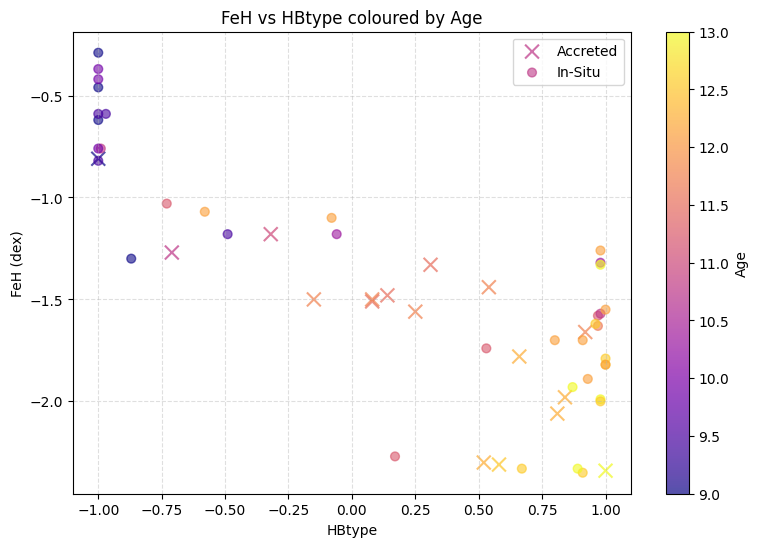

In [10]:
#plot HBtype
fig, ax = plt.subplots(figsize=(9,6))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sc = ax.scatter( Accreted['HBtype'],Accreted['FeH'], c=Accreted['Age'], cmap='plasma',marker='x',  s=100,  alpha=0.7,label='Accreted')
sc2 = ax.scatter(InSitu['HBtype'], InSitu['FeH'],c=InSitu['Age'], cmap='plasma',s=40,alpha=0.6,marker='o',label='In-Situ')


# Axis labels
ax.legend()
ax.set_xlabel('HBtype')
ax.set_ylabel('FeH (dex)')
ax.set_title('FeH vs HBtype coloured by Age')
ax.grid(True, ls='--', alpha=0.4)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Age')

## Age metalicity relation

It shows two clearly seperated sequences forming from the accreted and in-situ GCs. The in-situ clusters lie on a metal-rich branch whereas the accreted clusters lie on the metal poor branch (seen as the insitu have a higher FeH at a given age). This bifurcation was also found in previous works such as VandenBerg 2013 where they found that in-situ GCs where several Gyrs older at a fixed FeH. 

## orbital parameters
The accreted set shows a higher eccentricity while the in-situ have more circular orbits reflecting their origin in a rotating disk. The Accreted also include GCs with a high apocentric and zmax distance while all in-situ have a low apocentric and zmax distance.

## Spin up signature

spin up is the point where the milky way transitioned from a random spheroidal halo into a flattened rotating disk. The age metalicity plot reveals the spin up signuature around the point FeH = -1 where the in-situ polynomial starts to flatten. This flattening means that after this metalicity the MW could rapidly enrich its gas without much delay between generations of clusters which is a hallmark of a well mixed rotating disk. In other words before FeH = -1 the galaxy was still building mass and enriching slowly but after the galaxy is showing to had "spun up" into a disk. This corresponds to about 12Gyrs ago.

Before the spin-up transition FeH <-1 we can see that the eccentricities are high, the zmaxes and apocentric distances are also higher. 